# Decision Trees
You should build a machine learning pipeline using a decision tree model. In particular, you should do the following:
- Load the `mnist` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Conduct data exploration, data preprocessing, and feature engineering if necessary.
- Train and test a decision tree model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

##Importing Required Libraries

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import plot_tree

##Reading the Dataset

In [119]:
df = pd.read_csv("https://raw.githubusercontent.com/m-mahdavi/teaching/refs/heads/main/datasets/mnist.csv")

In [120]:
df.head(3)

,id,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,31953,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34452,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60897,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##Splitting the Dataset

In [121]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train.shape, df_test.shape

((3200, 786), (800, 786))

##Data Exploration

In [122]:
df_train.isnull().sum()

,0
id,0
class,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel780,0
pixel781,0
pixel782,0
pixel783,0


In [123]:
df_train.dtypes.value_counts()

,count
int64,786


##Data Preprocessing

In [124]:
x_train = df_train.drop(["id","class"], axis=1)
y_train = df_train["class"]

x_test = df_test.drop(["id","class"], axis=1)
y_test = df_test["class"]

x_train.shape, y_train.shape
x_test.shape, y_test.shape

((800, 784), (800,))

##Feature Engineering

In [143]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# Observed a slight improvement in accuracy when we do not do scaling




##Model Preparation

In [144]:
dc = DecisionTreeClassifier()
dc.fit(x_train, y_train)

DecisionTreeClassifier()

##Model Prediction

In [141]:
y_predict = dc.predict(x_test)

##Model Evaluation

In [142]:
accuracy = accuracy_score(y_test, y_predict)
accuracy

0.75125

##Visualization

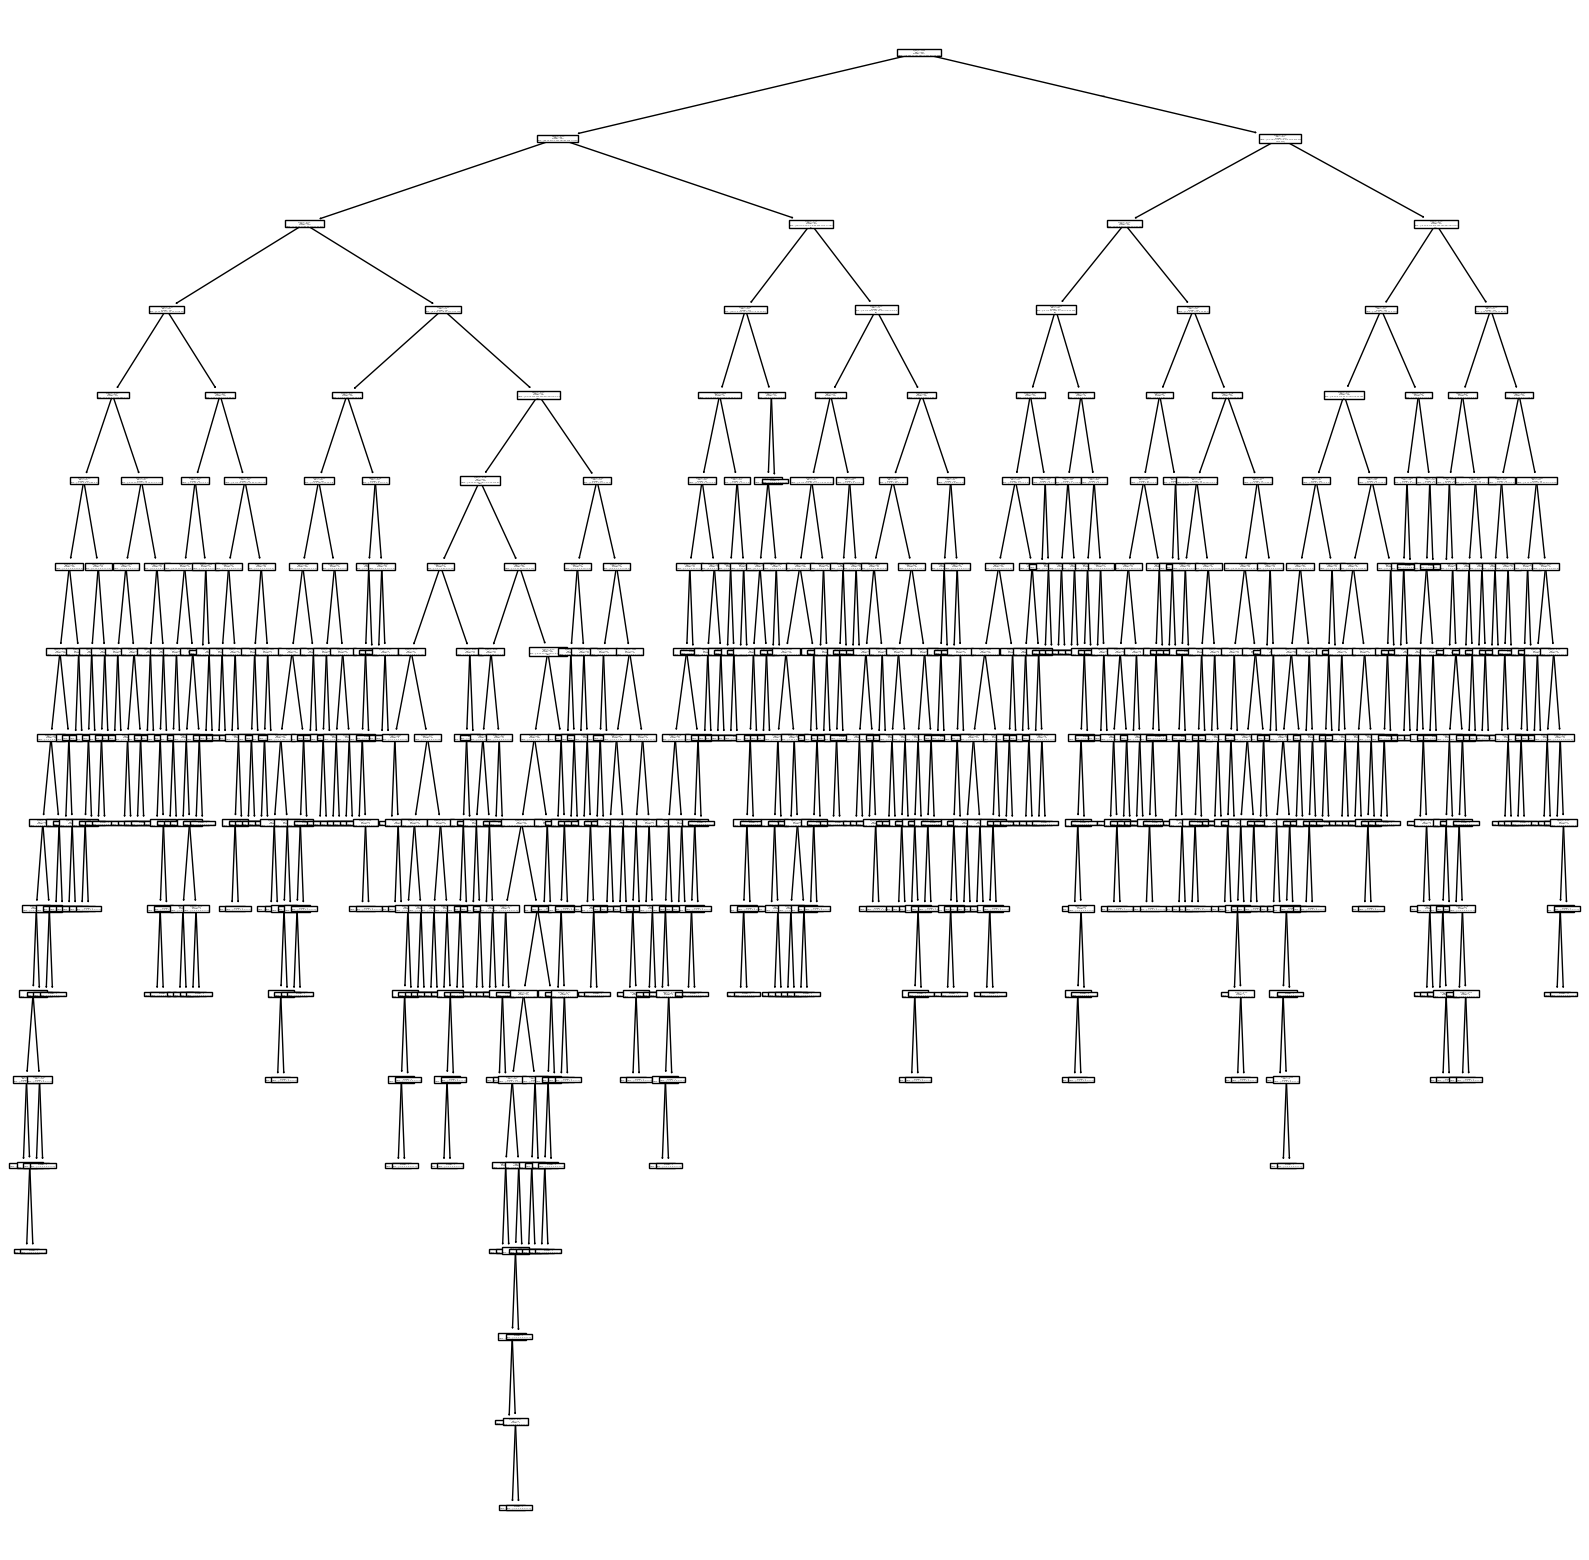

In [103]:
plt.figure(figsize=(20,20))
plot_tree(dc)
plt.show()
